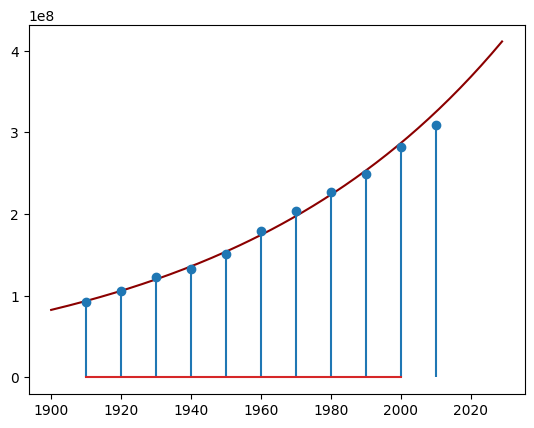

324601931.0659986


In [11]:
years = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]
population = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906]

from math import *
import matplotlib.pyplot as plt

def check_args(xs, ys):
    if len(xs) != len(ys):
        raise Exception(f"len(xs) = {len(xs)} != {len(ys)} = len(ys)")

# P(x) = ax + b
# returns tuple (a, b)
def get_linear_LSM_coefficients(xs : list[float], ys : list[float]) -> tuple[float, float]:
    check_args(xs, ys)
    sum_x = sum(xs)
    sum_y = sum(ys)
    sum_xy = sum(map(lambda x, y: x*y, xs, ys))
    sum_xx = sum(map(lambda x: x*x, xs))
    N = len(xs)
    a = (N * sum_xy - sum_x * sum_y) / (N * sum_xx - sum_x * sum_x)
    b = (sum_y - a * sum_x) / N
    return a, b
    
# P(x) = exp(ax + b)
# returns tuple (a, b)
def get_exponential_LSM_coefficients(xs : list[float], ys : list[float]) -> tuple[float, float]:
    check_args(xs, ys)
    return get_linear_LSM_coefficients(xs, list(map(log, ys)))

# P(x) = ax + b
# returns tuple (a, b)
def get_linear_LSM_function(xs : list[float], ys : list[float]):
    a, b = get_linear_LSM_coefficients(xs, ys)
    return lambda x: a * x + b

# P(x) = exp(ax + b)
# returns tuple (a, b)
def get_exponential_LSM_function(xs : list[float], ys : list[float]) -> tuple[float, float]:
    a, b = get_exponential_LSM_coefficients(xs, ys)
    return lambda x: exp(a * x + b)

approx = get_exponential_LSM_function(years, population)

xs = [x for x in range(1900, 2030)]
ys = [approx(x) for x in xs]
plt.plot(xs, ys, color="#8B0000")
plt.stem(years, population)
plt.stem([2010], [308745538])
plt.show()

print(approx(2010))

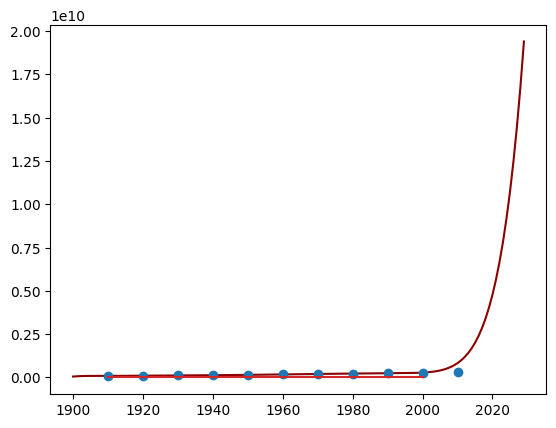

827906509.000001


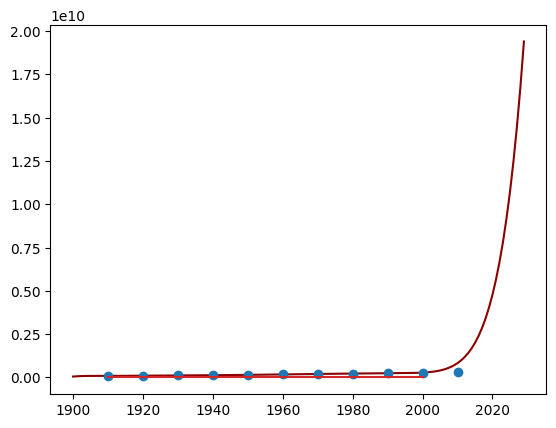

827906508.9999847


In [ ]:
def get_divided_differences(xs, ys):
    n = len(xs)
    table = [[0] * n for _ in range(n)]
    for i in range(n):
        table[i][0] = ys[i]
    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i+1][j-1] - table[i][j-1]) / (xs[i+j] - xs[i])
    return table

def calc_Newtons_Polynomial(xs, coefs, x):
    result = 0
    for n in range(1, len(coefs)):
        result = (result + coefs[-n]) * (x - xs[-n - 1])
    return coefs[0] + result

def get_Newtons_Polynomial(xs, ys):
    check_args(xs, ys)
    div_diffs = get_divided_differences(xs, ys)
    return lambda x: calc_Newtons_Polynomial(xs, div_diffs[0], x)

def get_N3(xs, ys):
    a = ys[0]
    b = (ys[1] - ys[0]) / (xs[1] - xs[0])
    c = ((ys[2] - ys[1]) / (xs[2] - xs[1]) - b) / (years[2] - years[0])
    return lambda x: a + b*(x - xs[0]) + c*(x - xs[0])*(x - xs[1])

approx = get_Newtons_Polynomial(years[::3], population[::3])
#approx = get_N3(years[-3:], population[-3:])

xs = [x for x in range(1900, 2030)]
ys = [approx(x) for x in xs]
plt.plot(xs, ys, color="#8B0000")
plt.stem(years, population)
plt.stem([2010], [308745538])
plt.show()

print(approx(2010))

def lagrange_interpolation(x_vals, y_vals, x):
    n = len(x_vals)
    result = 0.0
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if j != i:
                term *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        result += term
    return result

approx = lambda x: lagrange_interpolation(years[::3], population[::3], x)

xs = [x for x in range(1900, 2030)]
ys = [approx(x) for x in xs]
plt.plot(xs, ys, color="#8B0000")
plt.stem(years, population)
plt.stem([2010], [308745538])
plt.show()

print(approx(2010))